In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AIDS_Classification_50000.csv')
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


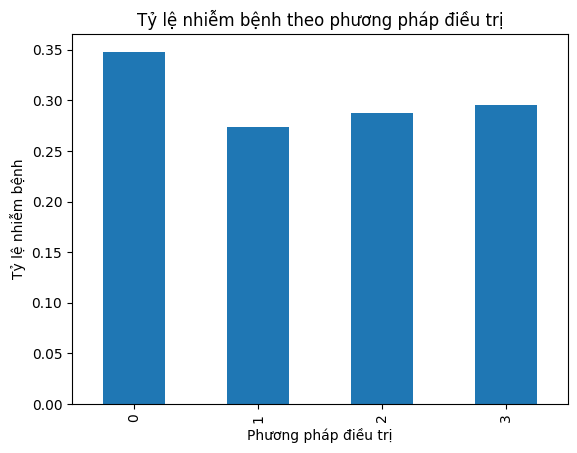

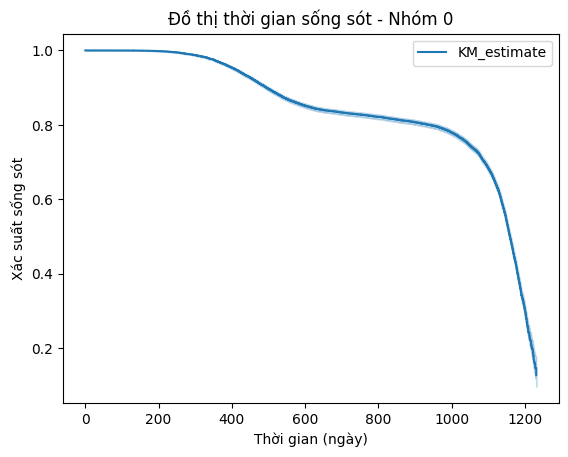

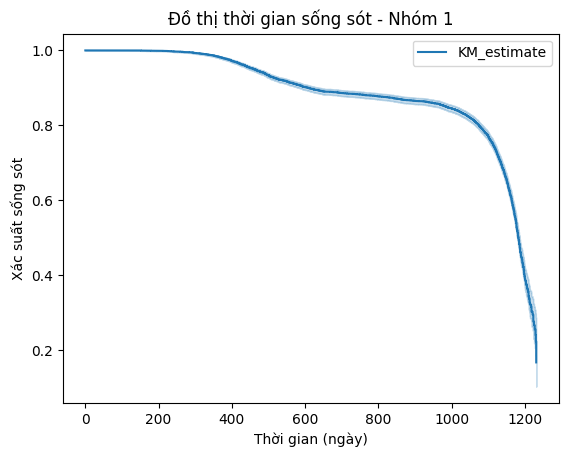

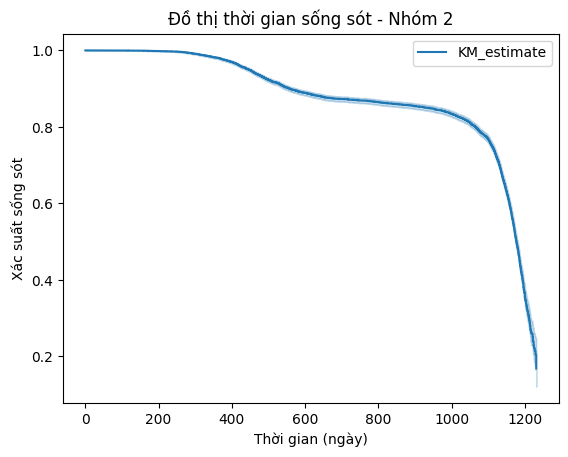

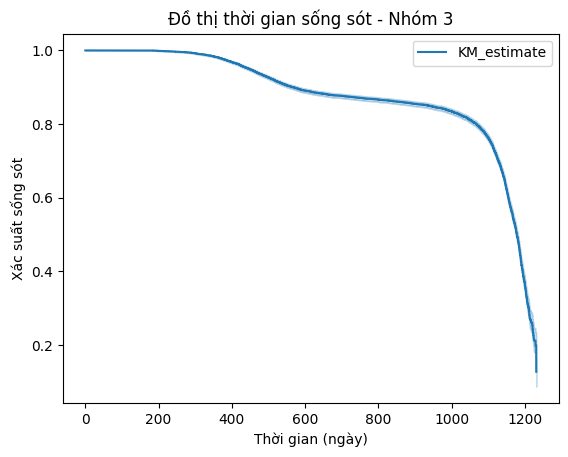

Optimization terminated successfully.
         Current function value: 0.617121
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               infected   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49996
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                0.003352
Time:                        11:22:40   Log-Likelihood:                -30856.
converged:                       True   LL-Null:                       -30960.
Covariance Type:            nonrobust   LLR p-value:                 9.875e-45
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6281      0.015    -40.792      0.000      -0.658      -0.598
C(trt)[T.1]    -0.3495    

In [6]:
# Tạo biểu đồ so sánh tỷ lệ nhiễm bệnh giữa các nhóm điều trị
import statsmodels.formula.api as sm
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

df.groupby('trt')['infected'].mean().plot(kind='bar')
plt.xlabel('Phương pháp điều trị')
plt.ylabel('Tỷ lệ nhiễm bệnh')
plt.title('Tỷ lệ nhiễm bệnh theo phương pháp điều trị')
plt.show()

# Vẽ đồ thị thời gian sống sót
kmf = KaplanMeierFitter()

groups = df.groupby('trt')
for name, group in groups:
    kmf.fit(group['time'], group['infected'])
    kmf.plot(title=f'Đồ thị thời gian sống sót - Nhóm {name}')
    plt.xlabel('Thời gian (ngày)')
    plt.ylabel('Xác suất sống sót')
    plt.show()

# Phân tích hồi quy
model = sm.logit('infected ~ C(trt)', data=df).fit()
print(model.summary())

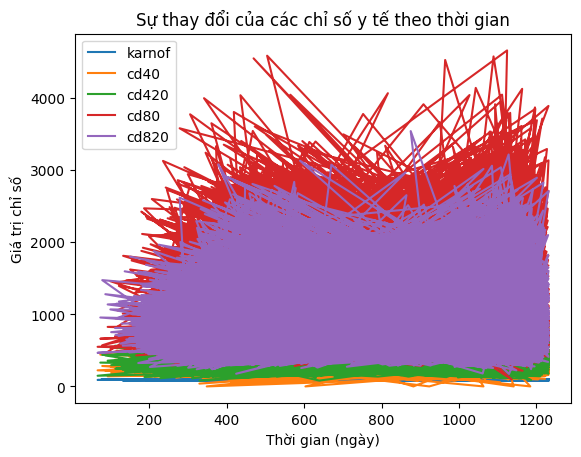

Optimization terminated successfully.
         Current function value: 0.594534
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               infected   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49994
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:                 0.03983
Time:                        08:55:08   Log-Likelihood:                -29727.
converged:                       True   LL-Null:                       -30960.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6849      0.191      8.838      0.000       1.311       2.059
karnof        -0.0042      0.

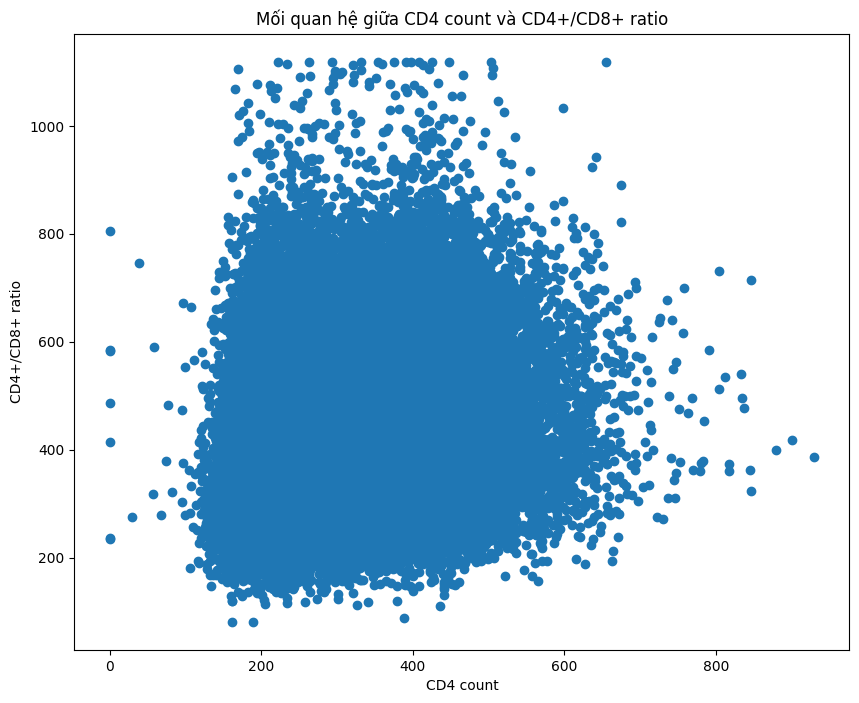

In [5]:
# Biểu đồ thể hiện sự thay đổi của các chỉ số y tế theo thời gian
df.plot(x='time', y=['karnof', 'cd40', 'cd420', 'cd80', 'cd820'])
plt.xlabel('Thời gian (ngày)')
plt.ylabel('Giá trị chỉ số')
plt.title('Sự thay đổi của các chỉ số y tế theo thời gian')
plt.show()

# Phân tích hồi quy logistic để xác định mối liên hệ giữa các chỉ số y tế và khả năng nhiễm bệnh
model = sm.logit(
    'infected ~ karnof + cd40 + cd420 + cd80 + cd820', data=df).fit()
print(model.summary())

# Biểu đồ phân tán để nghiên cứu mối quan hệ giữa các chỉ số y tế
plt.figure(figsize=(10, 8))
plt.scatter(df['cd40'], df['cd420'])
plt.xlabel('CD4 count')
plt.ylabel('CD4+/CD8+ ratio')
plt.title('Mối quan hệ giữa CD4 count và CD4+/CD8+ ratio')
plt.show()

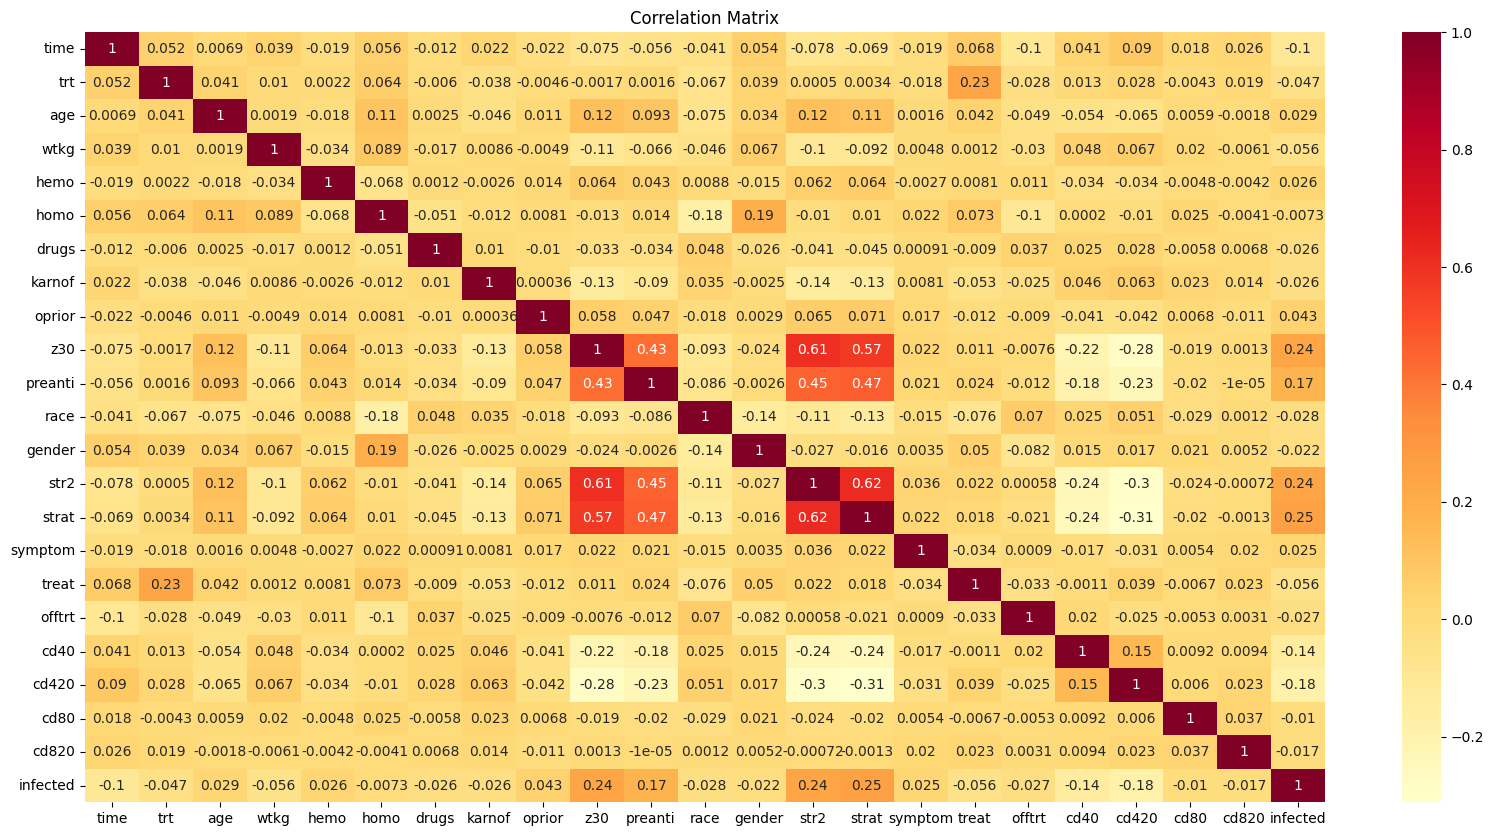

In [10]:
# Tính ma trận tương quan
corr_matrix = df.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

In [11]:
for col in df.columns:
    if col != 'infected':
        r, p_value = pearsonr(df['infected'], df[col])
        print(f"Correlation between '{col}' and 'infected': r={r:.2f}, p-value={p_value:.4f}")

Correlation between 'time' and 'infected': r=-0.10, p-value=0.0000
Correlation between 'trt' and 'infected': r=-0.05, p-value=0.0000
Correlation between 'age' and 'infected': r=0.03, p-value=0.0000
Correlation between 'wtkg' and 'infected': r=-0.06, p-value=0.0000
Correlation between 'hemo' and 'infected': r=0.03, p-value=0.0000
Correlation between 'homo' and 'infected': r=-0.01, p-value=0.1007
Correlation between 'drugs' and 'infected': r=-0.03, p-value=0.0000
Correlation between 'karnof' and 'infected': r=-0.03, p-value=0.0000
Correlation between 'oprior' and 'infected': r=0.04, p-value=0.0000
Correlation between 'z30' and 'infected': r=0.24, p-value=0.0000
Correlation between 'preanti' and 'infected': r=0.17, p-value=0.0000
Correlation between 'race' and 'infected': r=-0.03, p-value=0.0000
Correlation between 'gender' and 'infected': r=-0.02, p-value=0.0000
Correlation between 'str2' and 'infected': r=0.24, p-value=0.0000
Correlation between 'strat' and 'infected': r=0.25, p-value=0

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

logit_model = smf.logit(
    'infected ~ age + wtkg + karnof + homo + drugs + cd40 + cd80', data=df).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.606983
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               infected   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49992
Method:                           MLE   Df Model:                            7
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                 0.01972
Time:                        11:28:35   Log-Likelihood:                -30349.
converged:                       True   LL-Null:                       -30960.
Covariance Type:            nonrobust   LLR p-value:                1.696e-259
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4281      0.204      7.002      0.000       1.028       1.828
age            0.0067      0.